In [2]:
import os
os.chdir('/Users/jonas/Desktop/Books/Think Stats 2 - Allen B Downey/ThinkStats2-master/code')

In [20]:
import nsfg
import thinkstats2
import thinkplot
import seaborn as sns
import numpy as np

In [4]:
df = nsfg.ReadFemPreg()

In [8]:
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [11]:
# Hist object has neat methods
hist.Freq(2) # returns the values frequency, same as hist[2], for values that not exist, returns 0
hist.Values() # returns values of the object hist



dict_keys([1, 2, 3, 5])

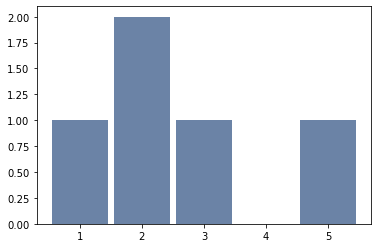

In [13]:
thinkplot.Hist(hist)

<AxesSubplot:ylabel='Count'>

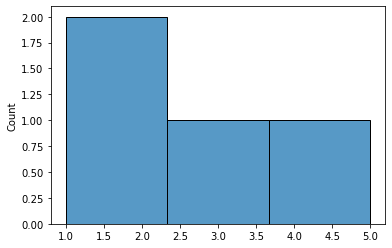

In [17]:
sns.histplot(hist)

In [18]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome==1]

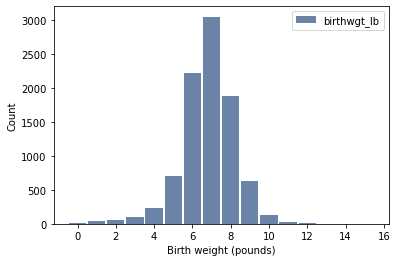

In [19]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Birth weight (pounds)', ylabel='Count')

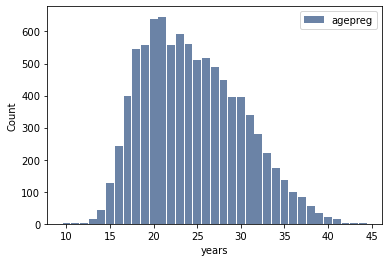

In [22]:
hist = thinkstats2.Hist(np.floor(live.agepreg), label='agepreg')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years', ylabel='Count')

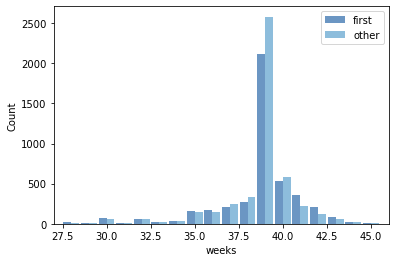

In [23]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
other_hist = thinkstats2.Hist(others.prglngth, label='other')

width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Config(xlabel='weeks', ylabel='Count', xlim=[27, 46])

In [40]:
def CohenEffectSize(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

In [41]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]

In [42]:
# Compute the Cohen effect size for the difference in pregnancy length for first babies and others.
CohenEffectSize(firsts,others)

caseid         0.033072
pregordr      -1.631418
howpreg_n           NaN
howpreg_p           NaN
moscurrp            NaN
                 ...   
finalwgt      -0.055088
secu_p        -0.010242
sest           0.025330
cmintvw             NaN
totalwgt_lb   -0.088673
Length: 244, dtype: float64

In [43]:
def WeightDifference(live, firsts, others):
    """Explore the difference in weight between first babies and others.

    live: DataFrame of all live births
    firsts: DataFrame of first babies
    others: DataFrame of others
    """
    mean0 = live.totalwgt_lb.mean()
    mean1 = firsts.totalwgt_lb.mean()
    mean2 = others.totalwgt_lb.mean()

    var1 = firsts.totalwgt_lb.var()
    var2 = others.totalwgt_lb.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in lbs', mean1 - mean2)
    print('Difference in oz', (mean1 - mean2) * 16)

    print('Difference relative to mean (%age points)', 
          (mean1 - mean2) / mean0 * 100)

    d = thinkstats2.CohenEffectSize(firsts.totalwgt_lb, others.totalwgt_lb)
    print('Cohen d', d)

In [44]:
WeightDifference(live,firsts,others)

Mean
First babies 7.201094430437772
Others 7.325855614973262
Variance
First babies 2.018027300915786
Others 1.9437810258964716
Difference in lbs -0.12476118453549034
Difference in oz -1.9961789525678455
Difference relative to mean (%age points) -1.7171423678372415
Cohen d -0.08867292707260174
